In [313]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [314]:
N = 200


X1 = np.random.randn(N//2, 2)
X2 = np.random.randn(N//2, 2) + 4
X = np.concatenate((X1, X2), axis=0)

rn = np.zeros((N, 2))

for i in range(N):
  nr = np.random.randint(0, 10)
  
  if(nr>=8):
    rn[i, 1] = 1
  else: 
    rn[i, 0] = 1

mus = X[np.random.permutation(N)[:2], :]



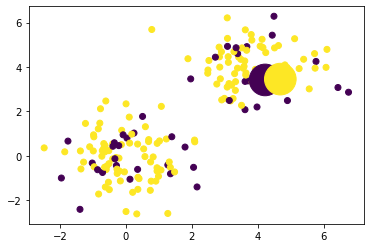

In [315]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=rn[:, 0])
plt.scatter(mus[:, 0], mus[:, 1], s=1000, c=mus[:, 1])


In [316]:
#!pip install parfor

In [317]:

def J():
  value = 0
  for i in range(N):
    for k in range(2):
      value += rn[i, k] * np.sum((X[i, :] - mus[:, k])**2)
  return value

tic = datetime.now()
s = J()
toc = datetime.now()
print(toc - tic)
print(s)



0:00:00.006316
4102.184497354947


In [318]:

def expectation():
  # expectation
  for ix in range(200):
    initial_assignment = rn[ix, :]
    cost_before_switch = J()
    #print("Initial assignment: ", initial_assignment, "with cost", cost_before_switch )
    rn[ix, 0] = 1 - rn[ix, 0] 
    rn[ix, 1] = 1 - rn[ix, 1] 
    cost_after_switch = J()
    #print("After switching, we have cost", cost_after_switch )
    if(cost_after_switch > cost_before_switch):
      rn[ix, 0] = 1 - rn[ix, 0]
      rn[ix, 1] = 1- rn[ix, 1]
  #after_expectation_step = J()
  #print("Before:", before_expectation_step, "; after:", after_expectation_step)
  # maximization step


before_expectation_step = J()
expectation()
after_expectation_step = J()

print("Before/after expectation: ", before_expectation_step, ",", after_expectation_step)


 

Before/after expectation:  4102.184497354947 , 2740.07023479924


In [319]:

def maximization():
  for mu_ix in range(2):
    mu_x = 0
    mu_y = 0
    for ix in range(200):
      mu_x += rn[ix, 0] * X[ix, 0]
      mu_y += rn[ix, 1] * X[ix, 1]
    mu_x /= np.sum(rn[:, 0])
    mu_y /= np.sum(rn[:, 1])
    mus[mu_ix, 0] = mu_x
    mus[mu_ix, 1] = mu_y
  #after_maximization_step = J()
  #print("Before: ", before_maximization_step)
  #print("After: ", after_maximization_step)


before_maximization_step = J()
maximization()
after_maximization_step = J()
print("Before/after maximization: ", before_maximization_step, ",", after_maximization_step)



Before/after maximization:  2740.07023479924 , 1145.0635931831982


Before/after expectation: 1145.0635931831982 , 700.5861379147767
Before/after maximization: 700.5861379147767 , 417.15590898142057
Before/after expectation: 417.15590898142057 , 381.79662575640066
Before/after maximization: 381.79662575640066 , 381.35084136588074
Before/after expectation: 381.35084136588074 , 381.35084136588074
Before/after maximization: 381.35084136588074 , 381.35084136588074
Before/after expectation: 381.35084136588074 , 381.35084136588074
Before/after maximization: 381.35084136588074 , 381.35084136588074
Before/after expectation: 381.35084136588074 , 381.35084136588074
Before/after maximization: 381.35084136588074 , 381.35084136588074


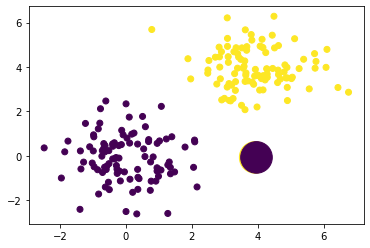

In [320]:
for iter in range(5):
  c1_before = J()
  expectation()
  c1_after = J()
  print("Before/after expectation:", c1_before, ",", c1_after)

  c2_before = J()
  maximization()
  c2_after = J()
  print("Before/after maximization:", c2_before, ",", c2_after)


plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=rn[:, 0])
plt.scatter(mus[:, 0], mus[:, 1], s=1000, c=mus[:, 1])


In [321]:
rn

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.